<br>
<font size="4">
<p>
# MODULO VI - Support Vector Machine (SVM)


## Support Vector Machine - Definición
Un Support Vector Machine es un algoritmo que se entrena con datos clasificados previamente (es supervisado) para cumplir dos tareas: Clasificación y regresión. ***La idea principal consiste en obtener un hiperplano que separe a dos clases con la mayor distancia posible entre los puntos que más se acercan a la clase contraria.*** En el caso de dos dimensiones, un hiperplano es una línea que separa al sistema de coordenadas en dos. En el caso de tres dimensiones, un hiperplano es un plano que separa el sistema de coordenadas tridimensional en dos espacios diferentes y así sucesivamente para dimensiones mayores. 

Originalmente fue planteado para problemas de clasificación binaria (pertenencia a una clase u otra) de datos que pueden ser separados linealmente, pero con ciertas modificaciones se pueden resolver problemas en que los límites de las clases no son distinguibles y existen más de dos clases.

En la siguiente imagen (wikimedia commons, 2008), se observa un problema de clasificación en dos dimensiones con dos clases:

<img src="imgs/hiperplano.png" width="600" height="400">


La ecuación de un hiperplano está dada por 3 componentes (Gunn, 1998):

- $W$: Es un vector que determina cómo se inclina el hiperplano. Este vector es normal al hiperplano, es decir, es perpendicular al hiperplano.
- $b$:  Es un escalar que determina qué tanto se mueve el hiperplano hacia un lado u otro sin cambiar la inclinación.
- $X$: Es un vector cuyo “final” está dentro del hiperplano, es decir, sus coordenadas están pertenecen al hiperplano.

Dados estos componentes la ecuación general de un hiperplano está dada por $W·X + b = c$, donde $c$ es otro escalar que sirve para evaluar si un punto cualquiera descrito por un vector se encuentra a un lado u otro del hiperplano.


**Los vectores de soporte son los puntos de cada clase que se encuentran más cerca del hiperplano que separa las clases.**

Como se puede ver en la gráfica, hay tres hiperplanos necesarios para poder clasificar una muestra:

- El hiperplano con la ecuación: $W·X + b = 1$. Es un hiperplano que pasa por el vector de soporte de la clase de puntos negros. Matemáticamente, el vector de soporte de los puntos negros tiene coordenadas que están dentro de este hiperplano. 
- El hiperplano con la ecuación: $W·X + b = -1$. Es un hiperplano que pasa por el vector de soporte de la clase de puntos blancos. Matemáticamente, el vector de soporte de los puntos blancos tiene coordenadas que están dentro de este hiperplano. Algo a destacar es el hecho de que puede haber más de un vector de soporte por clase, en este caso la clase de puntos blancos tiene dos, de los cuales solo se elige uno para el cálculo de distancia hacia la clase contraria (todos tienen la misma distancia). 
- El hiperplano con la ecuación: $W·X + b = 0$. Es el hiperplano que pasa en medio de las dos clases y las separa. Este es el que queremos hallar en nuestro algoritmo, ya que los otros dos se definen a partir de él (son paralelos y pasan por un punto los vectores de soporte).

Para poder hallar la clase Y de una muestra representada por un vector $X$ (en este caso de dos coordenadas $x_1$ y $x_2$) se evalúa en cual región definida por los hiperplanos está. En otras palabras, en qué intervalo numérico está es el valor de $W·X + b$. Existen tres casos posibles: 

- $W·X + b ≥ 1$: El punto pertenece a la clase de los puntos negros ( $Y = +1$) y está en la región encima del hiperplano $W·X + b = 1$.
- $W·X + b ≤ -1$: El punto pertenece a la clase de los puntos blancos ($Y = -1$) y está en la región debajo del hiperplano $W·X + b = -1$.
- Otro caso: El punto no pertenece a ninguna de las dos clases.

***Entonces, el entrenamiento de un SVM consiste en hallar el valor del vector $W$ y el valor $b$ que generen el hiperplano $W·X + b = 0$ que separe las clases con la mayor distancia los hiperplanos paralelos que pasan por los vectores de soporte.*** Tal $W$ está dado por:

<img src="imgs/primalproblem.png" width="700" height="500">

Esto quiere decir, que el problema de entrenar un SVM consiste en hallar un vector w cuya magnitud sea mínima, siempre y cuando TODAS las muestras en el conjunto de entrenamiento sean clasificadas en las clases que fueron definidas originalmente para ellas. Si hay un W con una magnitud mínima, pero no se clasificó alguna muestra correctamente se descarta. Si hay un W que permite clasificar todas las muestras correctamente, pero tiene una magnitud mayor a otras opciones que también cumplen, se descarta.


<br>
<font size="4">
<p>
## Librerías

In [1]:
#Librerias para manejo de arreglos y operaciones numericas
import numpy as np
import pandas as pd
from math import sqrt


#Libreria para graficar
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

#Libreria para generacion de datasets
from sklearn.datasets import make_circles

#librerias de modulos para SVM
from sklearn import svm

<br>
<font size="4">
<p>
# Razones para usar datos sintéticos en la parte guiada

Los datos generados en la sección Generación de datos no separables linealmente permiten observar las siguientes propiedades:

- Si se usa un kernel que no es apropiado para los datos, por más que se cambien los parámetros del clasificador será imposible clasificar las muestras de entrenamiento correctamente. Sección "Clasificación con un SVM lineal".
- Convertir los datos a un espacio de mayor dimensionalidad utilizando un mapeo manual para usar un SVM con kernel lineal (Este no aplica kernel trick) funciona bien, pero es necesario también convertir las muestras de prueba y futuras a ese espacio, lo cual es más pesado. 
- Al usar kernel trick en el proceso de entrenamiento, ya no es necesario mapear las muestras de prueba y futuras al espacio de mayor dimensionalidad, y aún así se obtiene un resultado similar al de usar mapeo explícito.
- El método usado en la sección "Clasificación usando Kernel trick" corresponde con lo que también se hace con datos reales a excepción del tratamiento de datos (esto se hace al comienzo taller).

<br>
<font size="4">
<p>
## Generación de datos no separables linealmente

Se genera una serie de 200 muestras aleatorias compuestas de dos coordenadas en un espacio de dos dimensiones. 50% de las muestras perteneceran a una clase y 50% a la otra clase. Existen dos clases: -1 y 1. La "forma" de las clases es circular, con el círculo de una clase dentro de la otra.

In [2]:
#Numero de muestras
n = 200


#X es el arreglo de coordenadas de las muestras de los datos de entrenamiento
#Y es el arreglo de etiquetas de clases para las muestras
X, Y = make_circles(n_samples=n, noise=0.07, factor=0.4)
Y[Y == 0] = -1

#Comprobando que las muestras esten distribuidas 50/50 en cada clase
porcentaje_menos_1 = len(np.where(Y == -1)[0]) / float(len(Y))
porcentaje_mas_uno = len(np.where(Y == 1)[0]) / float(len(Y))
print("Porcentaje de valores etiquetados con Y=-1:", porcentaje_menos_1)
print("Porcentaje de valores etiquetados con Y=1:",  porcentaje_mas_uno)

#Arreglos de coordenadas de las muestras separados para las clases 0 y 1 respectivamente
coord_0 = X[np.where(Y == -1)]
coord_1 = X[np.where(Y == 1)]

Porcentaje de valores etiquetados con Y=-1: 0.5
Porcentaje de valores etiquetados con Y=1: 0.5


In [4]:
print( "Primera muestra de la clase -1:",coord_0[0])
print( "Primera muestra de la clase 1:",coord_1[0])

Primera muestra de la clase -1: [-0.84305557  0.44145988]
Primera muestra de la clase 1: [ 0.33447406  0.21331365]


<br>
<font size="4">
<p>
Visualización de los datos originales de entrenamiento con sus coordenadas y clases predefinidas.

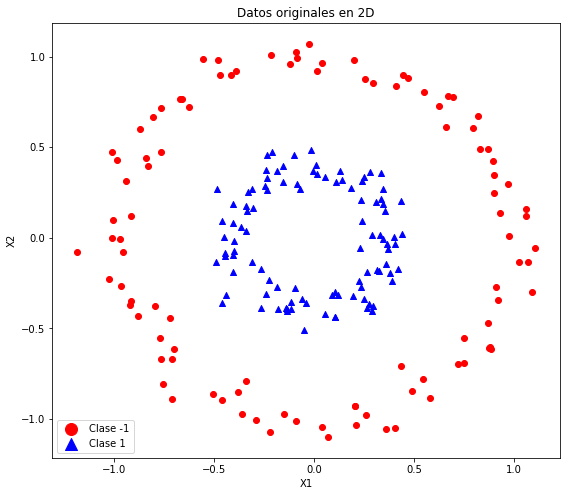

In [5]:
#Generacion de subplot
fig = plt.figure(figsize=(20,8))
ax2d = fig.add_subplot(122)

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax2d.scatter(coord_0[:,0], coord_0[:,1], c='r', marker='o',label='Clase -1')
ax2d.scatter(coord_1[:,0], coord_1[:,1], c='b', marker='^',label='Clase 1')

ax2d.set_xlabel('X1')
ax2d.set_ylabel('X2')
ax2d.set_title("Datos originales en 2D")

#Agregando leyenda
plt.legend(loc="lower left", markerscale=2., scatterpoints=1, fontsize=10)


plt.show()

<br>
<font size="4">
<p>
## Clasificación con un SVM lineal

La implementación más básica de un SVM se entrena con los datos originales sin hacer ninguna modificación. Para ello utilizamos el módulo LinearSVC de scikit-learn, con parametro C=1.0. Recordando la ecuación de los hiperplanos $W \cdot X + b = C$, tenemos que C es un parámetro para establecer que tanto margen de error queremos aceptar a nivel de clasificación. 

In [6]:
#Creacion de clasificador SVM lineal con parametro C=1.0
linear_svm = svm.LinearSVC(C=1.0)

#Entrenamiento del clasificador SVM con los datos originales
linear_svm.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<br>
<font size="4">
<p>
Al visualizar la clasificación realizada sin transformaciones, se tiene la siguiente gráfica, donde los datos de entrenamiento no se encuentran separados correctamente.

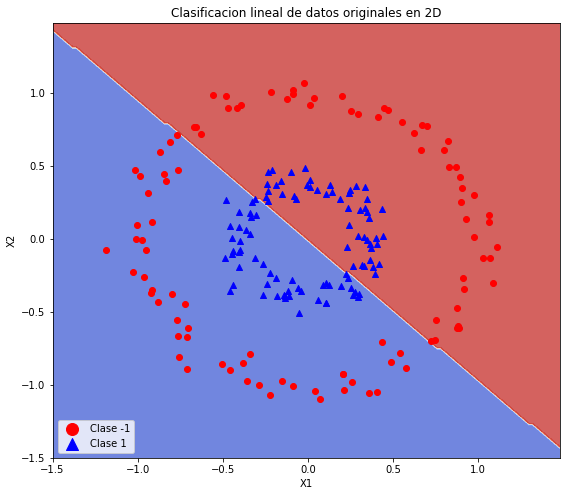

In [7]:
#Creacion de una maya para graficar las areas correspondientes a las clases (regiones de decision)
h = .02  

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, h),
                     np.arange(-1.5, 1.5, h))

#A veces es necesario invertir la prediccion de clasificacion (los valores estan multiplicados por -1, pero la prediccion funciona bien)
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)


fig = plt.figure(figsize=(20,8))
ax2d = fig.add_subplot(122)

ax2d.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax2d.scatter(coord_0[:,0], coord_0[:,1], c='r', marker='o',label='Clase -1')
ax2d.scatter(coord_1[:,0], coord_1[:,1], c='b', marker='^',label='Clase 1')

ax2d.set_xlabel('X1')
ax2d.set_ylabel('X2')
ax2d.set_title("Clasificacion lineal de datos originales en 2D")

#Agregando leyenda
ax2d.legend(loc="lower left", markerscale=2., scatterpoints=1, fontsize=10)

plt.show()

<br>
<font size="4">
<p>
## Clasificación en un espacio de mayor dimensionalidad y un SVM lineal

Como se puede ver, es imposible separar los puntos por medio de una línea recta, pero también se distingue el hecho de que las dos clases tienen forma de anillo, una envolviendo a la otra. Estos anillos vistos desde otro punto de vista pueden permitir la creación de un plano que deje a un lado los datos de una clase y al otro los datos de otra clase. 

Ese nuevo “punto de vista” consiste en adicionar una nueva dimensión que permita separar los datos. Para hacerlo, se introduce la transformacion $\phi$:

$$\phi : \mathbb{R}^2 \rightarrow \mathbb{R}^3$$
$$(x_1,x_2)   \rightarrow (x_1,x_2,x_1^2+x_2^2)$$

Esto se hace por cada muestra de entrenamiento, antes de utilizar el clasificador lineal de nuevo. La siguiente es la función de python correspondiente a este mapeo:

In [8]:
def phi(x1, x2):
    """ Implementa el mapeo phi(x1,y1) = [x1, y1, x1^2 + y1^2] """
    return np.array([x1, x2, x1**2.0 + x2**2.0])

<br>
<font size="4">
<p>
Con la función phi se procede a mapear los datos en el espacio tridimensional y a graficarlos para observar si son separables.

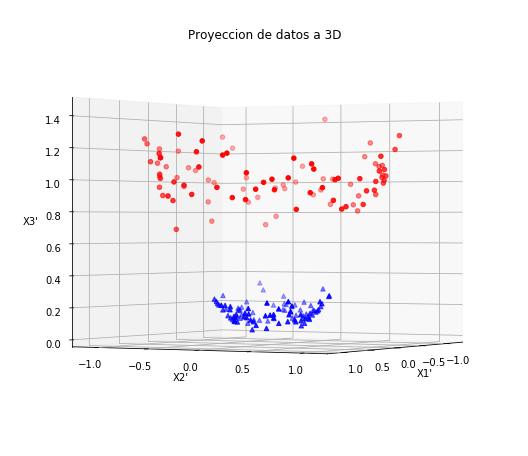

In [9]:
#Mapeo de los datos originales en X a datos en 3 dimensiones
X_3D = np.array([phi(xi,xj) for xi,xj in X])

X_3D_0 = X_3D[np.where(Y == -1)]
X_3D_1 =  X_3D[np.where(Y == 1)] 

#Graficando los datos en 3D
fig = plt.figure(figsize=(20,8))
ax3d = fig.add_subplot(122, projection='3d')

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax3d.scatter(X_3D_0[:,0],X_3D_0[:,1], X_3D_0[:,2], c='r', marker='o',label='Clase -1')
ax3d.scatter(X_3D_1[:,0],X_3D_1[:,1], X_3D_1[:,2], c='b', marker='^',label='Clase 1')

ax3d.set_xlabel('X1\'')
ax3d.set_ylabel('X2\'')
ax3d.set_zlabel('X3\'')
ax3d.set_title("Proyeccion de datos a 3D")


#Girando la grafica para hacer visible la separacion
ax3d.view_init(elev=0,azim=30)
plt.show()

<br>
<font size="4">
<p>
Ahora todas las muestras del conjunto de entrenamiento de la clase 0 se encuentran separadas de las de la clase 1 respecto a la nueva dimensión $X3'$. Con estos datos podemos entrenar un clasificador lineal como el anterior, pero esta vez obtendremos mejores resultados.

In [10]:
#Creacion de clasificador SVM lineal con parametro C=1.0
linear_svm_3D = svm.LinearSVC(C=1.0)

#Entrenamiento del clasificador SVM con los datos originales
linear_svm_3D.fit(X_3D, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<br>
<font size="4">
<p>
Para observar el hiperplano de separación de clases se tiene en cuenta que este se conforma de todos los puntos X que cumplen la condición  $W \cdot X + b = 0$, en el problema original de dos coordenadas.

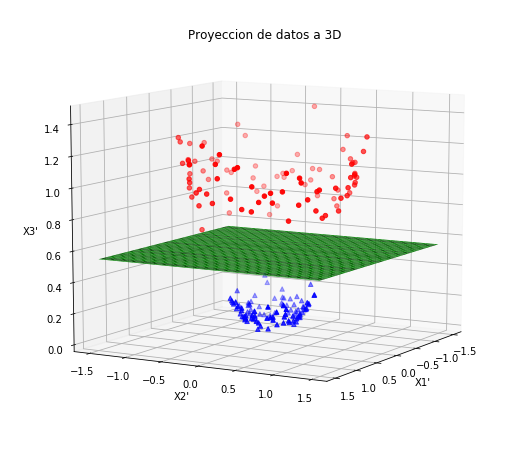

In [11]:
#Creacion de la visualizacion del hiperplano

#Funcion lambd para obtener puntos x, tales que w.x + b = 0 
z = lambda x,y: (-linear_svm_3D.intercept_[0]-linear_svm_3D.coef_[0][0]*x-linear_svm_3D.coef_[0][1]) / linear_svm_3D.coef_[0][2]

#Definiendo puntos pertenecientes al hiperplano que estan en el area de la grafica

h=0.02

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, h),
                     np.arange(-1.5, 1.5, h))


fig = plt.figure(figsize=(20,8))
ax3d_c = fig.add_subplot(122, projection='3d')

#Graficando hiperplano
ax3d_c.plot_surface(xx, yy, z(xx, yy),color='g')

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax3d_c.scatter(X_3D_0[:,0],X_3D_0[:,1], X_3D_0[:,2], c='r', marker='o',label='Clase -1')
ax3d_c.scatter(X_3D_1[:,0],X_3D_1[:,1], X_3D_1[:,2], c='b', marker='^',label='Clase 1')



ax3d_c.set_xlabel('X1\'')
ax3d_c.set_ylabel('X2\'')
ax3d_c.set_zlabel('X3\'')
ax3d_c.set_title("Proyeccion de datos a 3D")


#Girando la grafica para hacer visible la separacion
ax3d_c.view_init(elev=10,azim=30)

plt.show()

<br>
<font size="4">
<p>
Este planteamiento funciona bien con problemas en que se sabe que el mapeo se puede realizar a un espacio de dimensionalidad finita. Por otro lado, para clasificar una nueva muestra, es necesario transformarla al espacio de mayor dimensionalidad y luego si clasificarla utilizando el SVM entrenado.


En el siguiente ejemplo se comprueba el hecho de que hay que mapear datos no vistos previamente al espacio de mayor dimensionalidad. Para ello se generan 200 datos de prueba entre los valores -1.5 y 1.5 para cada coordenada en el espacio original. 

NOTA: La gráfica de vista superior tiene rotados X1 y X2.

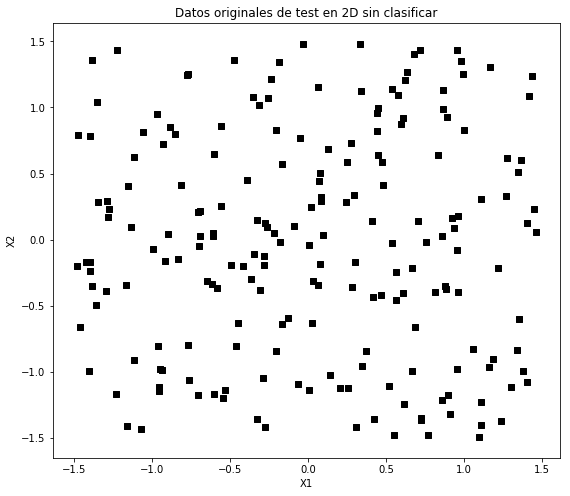

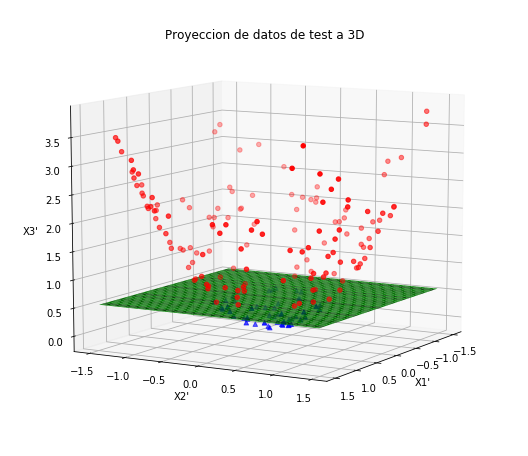

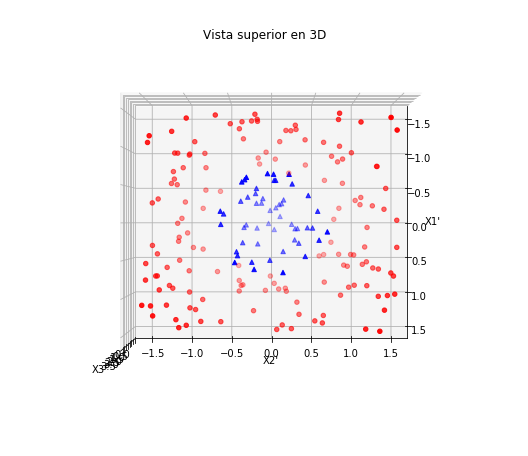

In [12]:
"""VISUALIZACION ORIGINAL 2D"""
#Generacion de puntos aleatorios de prueba
X_test_2D = np.random.rand(200,2)*3 - 1.5



#Generacion de subplot
fig = plt.figure(figsize=(20,8))
ax2d_test = fig.add_subplot(121)

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax2d_test.scatter(X_test_2D[:,0], X_test_2D[:,1], c='black', marker='s')

ax2d_test.set_xlabel('X1')
ax2d_test.set_ylabel('X2')
ax2d_test.set_title("Datos originales de test en 2D sin clasificar")

plt.show()

"""VISUALIZACION EN EL ESPACIO 3D"""

#Mapeo de datos al espacio de mayor dimensionalidad
X_test_3D = np.array([phi(x,y) for x,y in X_test_2D])

#Predicciones de SVM para puntos aleatorios de prueba
Y_predict_3D = linear_svm_3D.predict(X_test_3D)

#Separacion de muestras en dos clases para graficar
X_test_3D_0 = X_test_3D[np.where(Y_predict_3D == -1)]
X_test_3D_1 = X_test_3D[np.where(Y_predict_3D == 1)] 


fig = plt.figure(figsize=(20,8))
ax3d_t = fig.add_subplot(122, projection='3d')

#Graficando hiperplano se usa la funcion lambda z definida previamente
ax3d_t.plot_surface(xx, yy, z(xx, yy),color='g')

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax3d_t.scatter(X_test_3D_0[:,0],X_test_3D_0[:,1], X_test_3D_0[:,2], c='r', marker='o',label='Clase -1')
ax3d_t.scatter(X_test_3D_1[:,0],X_test_3D_1[:,1], X_test_3D_1[:,2], c='b', marker='^',label='Clase 1')


ax3d_t.set_xlabel('X1\'')
ax3d_t.set_ylabel('X2\'')
ax3d_t.set_zlabel('X3\'')
ax3d_t.set_title("Proyeccion de datos de test a 3D")


#Girando la grafica para hacer visible la separacion
ax3d_t.view_init(elev=10,azim=30)


""" VISUALIZACION DESDE ARRIBA SIN HIPERPLANO"""

fig = plt.figure(figsize=(20,8))
ax3d_t2 = fig.add_subplot(122, projection='3d')


#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax3d_t2.scatter(X_test_3D_0[:,0],X_test_3D_0[:,1], X_test_3D_0[:,2], c='r', marker='o',label='Clase -1')
ax3d_t2.scatter(X_test_3D_1[:,0],X_test_3D_1[:,1], X_test_3D_1[:,2], c='b', marker='^',label='Clase 1')


ax3d_t2.set_xlabel('X1\'')
ax3d_t2.set_ylabel('X2\'')
ax3d_t2.set_zlabel('X3\'')
ax3d_t2.set_title("Vista superior en 3D")


#Girando la grafica para hacer visible la separacion
ax3d_t2.view_init(elev=90,azim=0)
plt.show()


<br>
<font size="4">
<p>
## Clasificación usando kernel trick

**NOTA: Para evitar confusiones, en esta fragmento los índices i, j y k corresponden con el índice de alguna muestra dentro del conjunto de datos de entrenamiento, y L corresponde con el número total de muestras de entrenamiento.**

***Como se mencionó anteriormente, mapear los datos de entrenamiento explicitamente a un espacio de mayor dimensionalidad y luego utilizar un clasificador lineal con estos datos NO es la mejor forma de utilizar un SVM, debido a que los datos cuyas clases son desconocidas y se quieren predecir también tendrían que ser mapeados a ese espacio. Por medio del uso del kernel trick es posible usar el kernel solo en el proceso de entrenamiento.***

La operación de Kernel está definida como el producto punto de las representaciones de los vectores de datos en un espacio de mayor dimensionalidad.

$$K(x_i,x_j) = \langle \phi(x_i), \phi(x_j) \rangle$$ 


El problema de optimización original se puede reescribir sin usar a W y b,en lo que se conoce como problema dual. En esta nueva definición hay un producto punto entre dos vectores de datos $x_i$ y $x_j$:

<img src="imgs/dualproblem.png" width="500" height="300">

Este nuevo problema de optimización tiene las siguientes restricciones:
<img src="imgs/restriccionesdual.png" width="700" height="300">


Si los datos originales no son separables linealmente, esta ecuación no nos va a permitir clasificar los datos de una manera adecuada. Como se mencionó anteriormente, el problema de optimización sigue siendo el mismo sin importar el número de dimensiones a tratar. Entonces, ese producto punto entre dos vectores de datos puede ser reemplazado por una operación de Kernel entre ellos(Gunn, 1998).


<img src="imgs/dualkernel.png" width="500" height="300">


Para hallar el resultado de una operación de kernel, no es necesario mapear los dos vectores al espacio de mayor dimensionalidad y luego calcular su producto punto, ya que el valor númerico de un kernel se puede calcular haciendo operaciones numéricas con los datos en el espacio original, como se ve en el siguiente ejemplo:

<img src="imgs/kerneltrick.png" width="500" height="300">

Esto es lo que se conoce como kernel trick. Existe una serie de expresiones definidas para mapear a ciertos espacios de mayor dimensionalidad, una de ellas es la expresión para el kernel Gaussiano(Shawe-Taylor, 2004):

$$K(\mathbf {x_i} ,\mathbf {x_j} )=\exp \left(-{\frac {\|\mathbf {x_i} -\mathbf {x_j} \|^{2}}{2\sigma ^{2}}}\right)$$

Aquí no se hace un mapeo explicito para calcular el kernel, sino que se usan los dos vectores en el espacio original. El kernel trick también permite clasificar nuevas muestras sin la necesidad de mapearlas a un espacio de mayor dimensionalidad, debido a que este espacio solo se usa per medio de kernels en la fase de entrenamiento (Gunn, 1998).

En nuestro caso, vamos a hacer provecho de la libreria scikit-learn que hace el proceso de entrenamiento con kernel trick automáticamente, partiendo de los datos originales. Para entrenar nuestro SVM gaussiano necesitamos poner como parámetros el tipo de kernel como RBF (radial basis function), un valor para C=1.0 y dar un valor de gamma (2.0). Este último valor tiene que ser explorado experimentalmente en problemas más complejos.


In [13]:
#Los datos originales estan guardados en los arreglos X, Y

#Creacion de clasificador SVM Gaussiano con parametros C=1.0 y gamma=2.0
gaussian_svm = svm.SVC(C=1.0,kernel='rbf',gamma=2.0)
gaussian_svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<br>
<font size="4">
<p>
Visualizando las regiones de decisión (las regiones de las clases), y los puntos originales en una misma gráfica podemos observar que este kernel funciona mejor que el lineal con los datos originales.

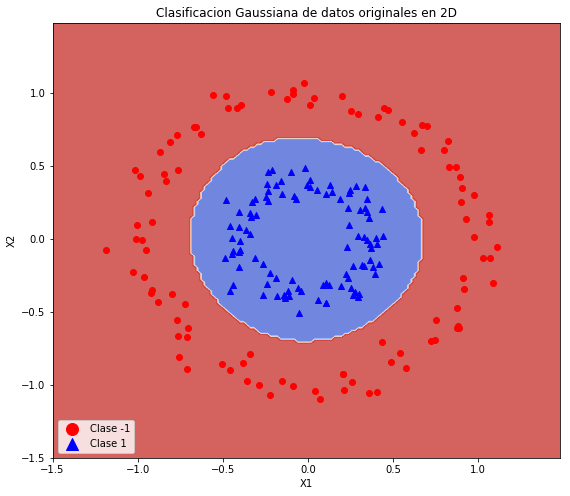

In [14]:
#Creacion de una maya para graficar las areas correspondientes a las clases
h = .02  

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, h),
                     np.arange(-1.5, 1.5, h))

#A veces es necesario invertir la prediccion de clasificacion (los valores estan multiplicados por -1, pero la prediccion funciona bien)
Z = gaussian_svm.predict(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)


fig = plt.figure(figsize=(20,8))
ax2d1 = fig.add_subplot(122)

ax2d1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax2d1.scatter(coord_0[:,0], coord_0[:,1], c='r', marker='o',label='Clase -1')
ax2d1.scatter(coord_1[:,0], coord_1[:,1], c='b', marker='^',label='Clase 1')

ax2d1.set_xlabel('X1')
ax2d1.set_ylabel('X2')
ax2d1.set_title("Clasificacion Gaussiana de datos originales en 2D")

#Agregando leyenda
ax2d1.legend(loc="lower left", markerscale=2., scatterpoints=1, fontsize=10)

plt.show()

<br>
<font size="4">
<p>
La siguiente gráfica muestra la predicción de datos de prueba aleatorios, sin la necesidad de transformarlos al espacio de mayor dimensionalidad. Los puntos son generados de la misma forma que antes (200 aleatorios con rango de valores -1.5, 1.5). 

***Para predecir la clase se usa el método gaussian_svm.predict(test), donde test es el arreglo de muestras de las que se quiere saber la clase.*** 

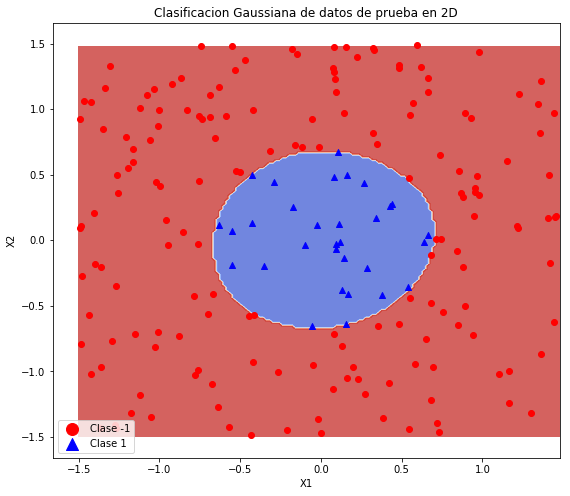

In [15]:
#Generacion de puntos aleatorios de prueba
X_test_2D_gaussian = np.random.rand(200,2)*3 - 1.5

#Prediccion de las clases

Y_predict_2D_gaussian = gaussian_svm.predict(X_test_2D_gaussian)

#Creacion de una maya para graficar las areas correspondientes a las clases
h = .02  

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, h),
                     np.arange(-1.5, 1.5, h))

#A veces es necesario invertir la prediccion de clasificacion (los valores estan multiplicados por -1, pero la prediccion funciona bien)
Z = gaussian_svm.predict(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)

#Separacion de muestras en dos clases para graficar
X_test_2D_gaussian_0 = X_test_2D_gaussian[np.where(Y_predict_2D_gaussian == -1)]
X_test_2D_gaussian_1 = X_test_2D_gaussian[np.where(Y_predict_2D_gaussian == 1)] 


fig = plt.figure(figsize=(20,8))
ax2dg = fig.add_subplot(122)

ax2dg.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#Agregando puntos a la visualizacion, triangulos azules para clase 1 y circulos rojos para clase 0.
ax2dg.scatter(X_test_2D_gaussian_0[:,0], X_test_2D_gaussian_0[:,1], c='r', marker='o',label='Clase -1')
ax2dg.scatter(X_test_2D_gaussian_1[:,0], X_test_2D_gaussian_1[:,1], c='b', marker='^',label='Clase 1')

ax2dg.set_xlabel('X1')
ax2dg.set_ylabel('X2')
ax2dg.set_title("Clasificacion Gaussiana de datos de prueba en 2D")

#Agregando leyenda
ax2dg.legend(loc="lower left", markerscale=2., scatterpoints=1, fontsize=10)

plt.show()

<br>
<font size="4">
<p>
### Predicción de clases manual a partir del entrenamiento

Para predecir la clase de una nueva muestra Z manualmente, en vez de utilizar el método predict, es necesario hallar el siguiente valor:

$$f(Z) = (\sum_{i=1}^{L} a_iy_i K(x_i,z)) + b$$

Y se tienen los siguientes casos:
- F(Z) ≥ 0: la muestra Z pertenece a la clase Y = +1. 
- F(Z)  ≤ 0: la muestra Z pertenece a la clase Y = -1. 


$b$ se puede hallar al calcular el kernel de una muestra concreta de entrenamiento $x_p$ con todas las muestras de entrenamiento $x_i$, existiendo L muestras en total:
 
 $$b = y_p - (\sum_{i=1}^{L} a_iy_i K(x_i,x_p))$$
 
Es recomendable promediar valores de $b$ calculados con diferentes $x_p$ para asegurar la precisión numérica.
 
El número de valores $\alpha_i$ que retorna scikit-learn es igual al número de vectores soporte encontrados en la solución del problema de optimización. Por lo tanto, para clasificar una nueva muestra, no se usan los datos de entrenamiento, sino solamente los vectores de soporte. La razón para esto es que solo los vectores de soporte tienen valores $\alpha_i$  distintos de cero.  

La clase de un vector de soporte está dada por el signo de su valor alfa correspondiente.

In [17]:
alphas = gaussian_svm.dual_coef_.flatten()
vectores_de_soporte = gaussian_svm.support_vectors_

print("alphas:")
print( alphas)
print("Vectores de soporte")
print(vectores_de_soporte)

alphas:
[-1.         -1.         -0.90053086 -0.46207277 -1.         -0.69717729
 -0.13471269 -1.         -1.         -0.08974682 -1.         -0.08749012
 -0.69945076  0.4225589   1.          1.          1.          0.01405413
  1.          1.          1.          1.          0.12289263  0.51167566
  1.        ]
Vectores de soporte
[[-0.6615495  -0.60688615]
 [ 0.83466732 -0.32644157]
 [-0.22837501 -0.87502419]
 [ 0.71026948  0.6271787 ]
 [-0.10737623 -0.82265056]
 [-0.68519138  0.61552366]
 [ 0.88486341 -0.27356549]
 [-0.25330257  0.81912832]
 [ 0.91695604  0.28317312]
 [-0.81212644  0.43063265]
 [-0.8520815  -0.19939234]
 [ 0.39609925 -0.83663702]
 [ 0.3636477   0.85898509]
 [ 0.34126969  0.36715646]
 [-0.29999768  0.38101783]
 [-0.39982117 -0.49343606]
 [-0.45236805 -0.21847723]
 [-0.40649283 -0.27929932]
 [ 0.4967257   0.16744612]
 [-0.1081054  -0.5199668 ]
 [-0.15406279  0.56726654]
 [ 0.55049676  0.04109679]
 [ 0.02320872  0.47319047]
 [ 0.50040387  0.00924602]
 [-0.19406925 -0.4

<br>
<font size="4">
<p>
El siguiente código permite calcular el valor de b.

In [19]:
#libreria para calculo de kernel gaussiano
from sklearn.metrics.pairwise import rbf_kernel

#Funcion signo, permite saber a que clase pertenece un vector de soporte
sign = lambda x: (1, -1)[x < 0]

#Matriz de kernel todos contra todos
kernel_matriz = rbf_kernel(vectores_de_soporte,vectores_de_soporte,gamma=2.0)

b=0.0
#Ciclo para calcular la sumatoria con los vectores de soporte
#Es mejor promediar el b calculado de varios puntos
for p,x_p in enumerate(vectores_de_soporte):
    #Calculo de la sumatoria para cada x_p
    sumatoria=0.0
    for i, x_i in enumerate(vectores_de_soporte):
        sumatoria += alphas[i]*kernel_matriz[p][i]
    #Calculo de b para cada x_p
    #Todos los b se suman para luego calcular el promedio
    b +=  sign(alphas[p]) - sumatoria 
      
b /=len(vectores_de_soporte)

print("Valor de b",b)

Valor de b -0.941922133903


<br>
<font size="4">
<p>
El valor de b puede variar un poco del que se obtiene del atributo intercept_ del módulo de svm de sklearn, debido a que estamos calculando los kernels manualmente y la precisión de los métodos puede variar. 

In [20]:
print("valor de b, segun sklearn", gaussian_svm.intercept_)

valor de b, segun sklearn [-0.98705576]


<br>
<font size="4">
<p>
La siguiente es una función que calcula el valor de f(z):

In [21]:
def f(z):
    #Calculo del kernel de z contra todos los vectores de soporte
    kernel_z_vs_todos = rbf_kernel(vectores_de_soporte,[z],gamma=2.0)
    
    suma=0.0
    #Calculo de la sumatoria
    for i, x_i in enumerate(vectores_de_soporte):
        suma += alphas[i]*kernel_z_vs_todos[i][0]
    #Suma con b
    f = suma + b
    
    return f

In [22]:
def clasificar_manualmente(z):

    if(f(z) >= 0):
        return "Clase 1"
    elif(f(z) < 0):
        return "Clase -1"
    

<br>
<font size="4">
<p>
Ejemplo con una muestra de la clase 0 (tiene coordenadas -1.0,-1.0):

In [24]:
print(clasificar_manualmente([-1.0,-1.0]))

Clase -1


<br>
<font size="4">
<p>
Ejemplo con una muestra de la clase 1 (tiene coordenadas 0.0,0.0):

In [26]:

print(clasificar_manualmente([0.0,0.0]))

Clase 1


# Modulo VI - TALLER
<BR>

## Clasificación multiclase 
<br>
<font size="4">
<p>

El dataset a usar tiene muestras de huevos de 3 diferentes especies de peces:
- Trucha marrón.
- Trucha arcoiris.
- Salmón rosado.

Dado que la trucha marrón y la trucha arcoiris son especies invasoras, se quiere desarrollar un clasificador que permita clasificar huevos a futuro para saber si el número de salmones rosados está disminuyendo gracias al incremento de peces especies invasoras. Para ello, el clasificador debe ser capaz de determinar a que especie pertenece un huevo dados los siguientes atributos:
- Peso del huevo en miligramos: Variable continua en el rango de 0 a 14.
- Diametro del huevo en milimetros: Variable continua en el rango de 0 a 10.
- Tipo de pez: Variable categórica con valores 0, 1, 2. (Trucha marrón: 0, Trucha arcoiris: 1, Salmón rosado: 2)

En el archivo fishes.txt, los atributos se encuentran de la siguiente forma:
- Columna 1: Peso.
- Columna 2: Diametro.
- Columna 3: Tipo de pez.

A continuación se leen los datos, se agregan nombres a los atributos y se mira que sus propiedades correspondan con las descritas.

In [ ]:
#Lectura de datos
df = pd.read_csv('datasets/fishes.txt',header = None, delimiter=' *, *', engine='python')

In [ ]:
df.columns =['peso','diametro','clase']
df.head(10)

In [24]:
df.describe()

peso    diametro       clase
count  600.000000  600.000000  600.000000
mean     6.643762    4.871712    1.000000
std      2.449490    1.490264    0.817178
min      1.707909   -0.389893    0.000000
25%      4.329696    3.758627    0.000000
50%      6.915465    4.918420    1.000000
75%      8.578834    5.979020    2.000000
max     12.773875    8.547168    2.000000

<br>
<font size="4">
<p>
Existen valores de diametro que son negativos y pueden afectar los resultados. Así que es necesario eliminarlos.

In [25]:
df = df[df.diametro > 0]
df.describe()

peso    diametro       clase
count  599.000000  599.000000  599.000000
mean     6.643789    4.880496    0.998331
std      2.451537    1.475882    0.816836
min      1.707909    1.160998    0.000000
25%      4.326757    3.770519    0.000000
50%      6.919241    4.920428    1.000000
75%      8.579531    5.979586    2.000000
max     12.773875    8.547168    2.000000

In [26]:
df.describe()

peso    diametro       clase
count  599.000000  599.000000  599.000000
mean     6.643789    4.880496    0.998331
std      2.451537    1.475882    0.816836
min      1.707909    1.160998    0.000000
25%      4.326757    3.770519    0.000000
50%      6.919241    4.920428    1.000000
75%      8.579531    5.979586    2.000000
max     12.773875    8.547168    2.000000

<br>
<font size="4">
<p>
 
Verificación de existencia de valores nulos.

In [27]:
df.isnull().sum()

peso        0
diametro    0
clase       0
dtype: int64

<br>
<font size="4">
<p>
Ahora sabemos que el dataset está en un formato adecuado para hacer clasificación (SVM no exige que los datos estén normalizados y no hay datos categóricos diferentes a la clase).

<br>
<font size="4">
<p>

El procedimiento para hacer clasficación multiclase utilizando la librería scikit-learn es igual al proceso de etiquetar con dos clases:

## Punto 1 

A partir de los datos guardados en el dataframe df cree los siguientes arreglos (puede usar la función values de dataframe):
- **X_taller**: Un arreglo que guarda las columnas peso y diametro del dataframe df. Este arreglo representa las coordenadas de los vectores de las muestras de entrenamiento. Dimensiones del arreglo: 599 filas, 2 columnas.


- **Y_taller**: Un arreglo que guarda la columna clase del dataframe df. Este arreglo representa las etiquetas de clases que tienen las muestras de entrenamiento. Dimensión: Es un arreglo de 599 valores. Recomendación: Asegurarse que no quede como un arreglo de 599 arreglos cada uno de un solo valor.


- **X_taller_0**: Un arreglo que guarda las columnas peso y diametro del dataframe df, pero solo para los datos de la clase 0.


- **X_taller_1**: Un arreglo que guarda las columnas peso y diametro del dataframe df, pero solo para los datos de la clase 1.


- **X_taller_2**: Un arreglo que guarda las columnas peso y diametro del dataframe df, pero solo para los datos de la clase 2.

Utilice estos arreglos para hacer una gráfica 2D en que se visualice como están distribuidas las clases en las muestras de entrenamiento (Como en la primera gráfica en la sección "Generando datos no separables linealmente").

<br>
<font size="4">
<p>
## Punto 2

Utilice los siguientes parámetros para entrenar un SVM lineal usando los datos del taller:
- C= 2.0.

NOTA: Para hacerlo, NO haga el mapeo explicito de los datos de entrenamiento a un espacio de mayor dimensionalidad antes de entrenar el clasificador. Esto se exige por las siguientes razones:
- En el punto anterior se observa que la mayoría de los puntos se puede separar linealmente. La excepción son puntos muy particulares que estan en el área de otras clases.
- A pesar de que existen datos de una clase en el área de otra clase, los módulos SVM de scikit-learn usan soft margin, es decir, no tienen en consideración ese tipo de datos.


Entrenar un SVM para solucionar un problema multiclase con scikit-learn se hace de la misma forma que un problema de solo dos clases. La idea consiste en entrenarlo pasando como argumento un arreglo de coordenadas de muestras y otro arreglo de etiquetas de clases. La única diferencia, es que en el arreglo de etiquetas de clases hay más de 2 valores posibles (en este caso 0, 1 y 2).

Grafique los puntos correspondientes a los datos de entrenamiento del taller y las regiones de decisión correspondientes (áreas de las clases). Como referencia se tiene la primera gráfica de la sección "Clasificación usando kernel trick".

<br>
<font size="4">
<p>
## Punto 3

Repita el mismo procedimiento con un SVM con Kernel gaussiano (rbf) y los siguientes parámetros:
- C= 0.5
- Gamma = 0.2

<br>
<font size="4">
<p>
# Modulo VI - QUIZ
<BR>

<font size="4">
<p> <b>Pregunta 1</b><br>
Los ejercicios presentados en este notebook poseen datos de baja dimensionalidad (máximo 3 coordenadas para una muestra). En un caso de muy alta dimensionalidad, en que la visualización gráfica de todas las coordenadas y clases en un mismo gráfico no sea posible, ¿Qué estrategia sería la mejor para establecer que tipo de kernel es más conveniente?
</p>
<br>

<br>
<font size="4">
<p>
## Referencias
- Graphic showing the maximum separating hyperplane and the margin’ by Cyc available at https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png under a Creative Commons Attribution 2.0. 
- Linear Support Vector Classification. (2015, May 11). Retrieved August 2, 2017, from http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
- Shawe-Taylor, John & Cristianini, Nello (2004). 3.4 Kernel construction. In Kernel Methods for Pattern Analysis. Cambridge University Press.
- Gunn, S.R. (1998, May 10) Support vector machines for classification and regression. Technical Report, School of Electronics and Computer Science, University of Southampton. Retrieved August 2, 2017, from http://users.ecs.soton.ac.uk/srg/publications/pdf/SVM.pdf
- C-Support Vector Classification. (2015, May 11). Retrieved August 3, 2017, from http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


